In [1]:
from google.colab import files
import pandas as pd
import kagglehub

In [2]:
uploadded = files.upload()

Saving academic Stress level - maintainance 1.csv to academic Stress level - maintainance 1.csv


In [3]:

base = pd.read_csv('academic Stress level - maintainance 1.csv', sep= ';')

base.columns = ['timestamp', 'estagio_academico', 'pressao_colegas', 'pressao_casa',
    'ambiente_estudo', 'estrategia_coping', 'maus_habitos',
    'competicao_academica', 'estresse_indice']

print (base)


            timestamp estagio_academico  pressao_colegas  pressao_casa  \
0    24/07/2025 22:05     undergraduate                4             5   
1    24/07/2025 22:05     undergraduate                3             4   
2    24/07/2025 22:06     undergraduate                1             1   
3    24/07/2025 22:06     undergraduate                3             2   
4    24/07/2025 22:08     undergraduate                3             3   
..                ...               ...              ...           ...   
135  17/08/2025 13:02     undergraduate                3             2   
136  18/08/2025 14:36     undergraduate                4             2   
137  18/08/2025 17:13     undergraduate                3             3   
138  18/08/2025 19:08     undergraduate                4             5   
139  18/08/2025 22:40     undergraduate                4             2   

    ambiente_estudo                                  estrategia_coping  \
0             Noisy  Analyze the situ

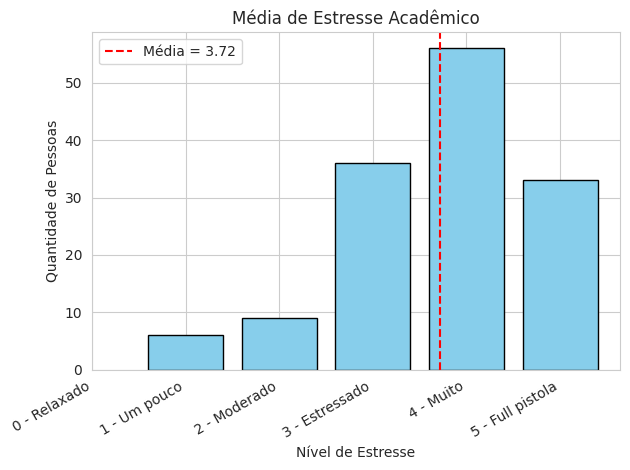

In [9]:

#Qual o nível médio de estresse acadêmico ?

import matplotlib.pyplot as plt

estresse = base['estresse_indice']

# Média
media_estresse = estresse.mean()

# Frequência de cada nível
contagem = estresse.value_counts().sort_index()

# Gráfico de barras
plt.bar(contagem.index, contagem.values, color="skyblue", edgecolor="black")

# Linha da média
plt.axvline(media_estresse, color="red", linestyle="--", label=f"Média = {media_estresse:.2f}")

# Ajustes visuais
plt.xticks(range(6), [
    "0 - Relaxado",
    "1 - Um pouco",
    "2 - Moderado",
    "3 - Estressado",
    "4 - Muito",
    "5 - Full pistola"
], rotation=30, ha="right")

plt.title("Média de Estresse Acadêmico")
plt.xlabel("Nível de Estresse")
plt.ylabel("Quantidade de Pessoas")
plt.legend()
plt.tight_layout()
plt.show()

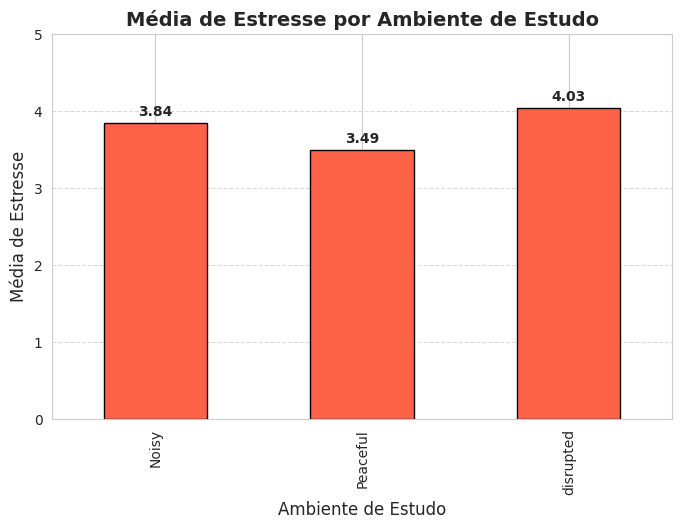

In [14]:
import matplotlib.pyplot as plt

# Calculando a média
media_estresse_por_ambiente = base.groupby('ambiente_estudo')['estresse_indice'].mean().round(2)

# Criando o gráfico
plt.figure(figsize=(8,5))
media_estresse_por_ambiente.plot(kind='bar', color='tomato', edgecolor='black')

# Personalização
plt.title("Média de Estresse por Ambiente de Estudo", fontsize=14, fontweight="bold")
plt.xlabel("Ambiente de Estudo", fontsize=12)
plt.ylabel("Média de Estresse", fontsize=12)
plt.ylim(0, 5)  # escala de 0 a 5
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Exibir valores acima das barras
for i, v in enumerate(media_estresse_por_ambiente):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.show()


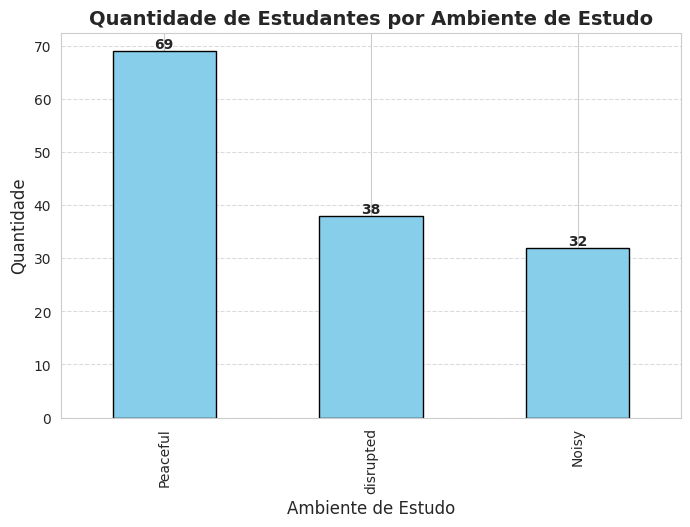

In [15]:
import matplotlib.pyplot as plt

# Contagem por ambiente
contagem_ambiente = base['ambiente_estudo'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,5))
contagem_ambiente.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalização
plt.title("Quantidade de Estudantes por Ambiente de Estudo", fontsize=14, fontweight="bold")
plt.xlabel("Ambiente de Estudo", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Mostrar valores acima das barras
for i, v in enumerate(contagem_ambiente):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()


In [12]:

# Qual a correlação entre o estresse e o nível de competição ?

correlacao = base['estresse_indice'].corr(base['competicao_academica'])
print(f"\n A correlação entre o estresse e o nível de competição é : {correlacao:.2f}")



 A correlação entre o estresse e o nível de competição é : 0.45


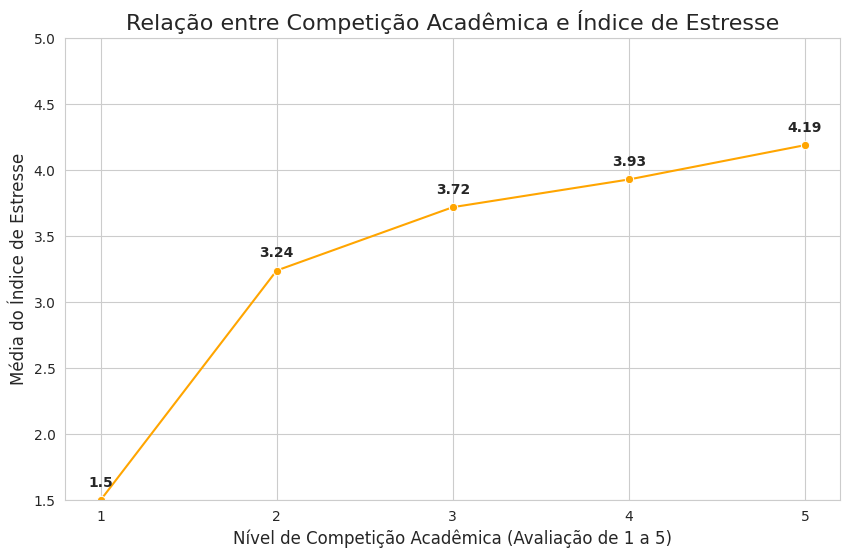

In [19]:
# Criar estresse_por_competicao antes do gráfico
estresse_por_competicao = base.groupby('competicao_academica')['estresse_indice'].mean().round(2)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=estresse_por_competicao.index,
             y=estresse_por_competicao.values,
             marker='o', color='orange')

plt.title('Relação entre Competição Acadêmica e Índice de Estresse', fontsize=16)
plt.xlabel('Nível de Competição Acadêmica (Avaliação de 1 a 5)', fontsize=12)
plt.ylabel('Média do Índice de Estresse', fontsize=12)
plt.xticks(estresse_por_competicao.index)

# Ajustar o eixo Y para começar em 1.5
plt.ylim(1.5, 5)  # limite inferior em 1.5 e superior em 5

plt.grid(True)

# Mostrar os valores nos pontos
for x, y in zip(estresse_por_competicao.index, estresse_por_competicao.values):
    plt.text(x, y + 0.1, str(y), ha='center', fontweight='bold')

plt.show()
